In [108]:
import pandas as pd
import numpy as np

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:
from scipy import stats

In [111]:
df = pd.read_csv('data/kc_house_data.csv')

In [112]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [114]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [115]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [116]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [117]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [118]:
df_reno = df[df.yr_renovated != 0]

In [119]:
df_reno = df_reno.dropna()

In [120]:
df_reno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,8,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,7,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,8,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,8,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,421059018,11/4/2014,257000.0,3,1.75,1397,18000,1.0,0.0,0.0,...,7,1397,0.0,1965,2014.0,98092,47.3388,-122.166,1950,31294
19602,6392000625,7/12/2014,451000.0,2,1.00,900,6000,1.0,0.0,0.0,...,7,900,0.0,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,126039256,9/4/2014,434900.0,3,2.00,1520,5040,2.0,0.0,0.0,...,7,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,2/25/2015,500012.0,4,2.50,2400,9612,1.0,0.0,0.0,...,8,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539


In [121]:
#getting rid of outliers
#getting rid of object columns
drop_these = ['date', 'sqft_basement']
df_reno = df_reno.drop(columns=drop_these)

In [122]:
#zscore method
df_1 = df_reno[(np.abs(stats.zscore(df_reno)) < 3).all(axis = 1)]

df_reno.index.difference(df_1.index)

Int64Index([  158,   230,   282,   754,  1253,  1259,  1261,  1786,  1806,
             1947,
            ...
            18702, 18707, 18745, 18899, 18910, 19089, 19159, 19233, 19308,
            19506],
           dtype='int64', length=107)

In [123]:
df_1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.440000e+02,5.440000e+02,544.000000,544.00000,544.000000,544.000000,544.000000,544.0,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,4.453795e+09,6.885046e+05,3.424632,2.22932,2200.108456,10649.064338,1.467831,0.0,0.452206,3.128676,7.659926,1778.288603,1939.814338,1997.818015,98097.972426,47.593010,-122.273748,1907.836397,9704.404412
std,2.942439e+09,3.988608e+05,0.948887,0.79008,858.148524,12605.104409,0.480153,0.0,1.021642,0.351248,1.059975,700.638921,21.831695,14.211827,54.668136,0.111811,0.106461,629.870112,9422.392138
min,3.600057e+06,1.100000e+05,1.000000,0.75000,580.000000,1024.000000,1.000000,0.0,0.000000,2.000000,5.000000,580.000000,1900.000000,1953.000000,98001.000000,47.213700,-122.445000,828.000000,1281.000000
25%,1.898653e+09,4.100000e+05,3.000000,1.75000,1540.000000,4800.000000,1.000000,0.0,0.000000,3.000000,7.000000,1240.000000,1922.000000,1989.000000,98042.000000,47.535500,-122.358000,1440.000000,5000.000000
50%,3.971701e+09,5.955000e+05,3.000000,2.00000,2115.000000,7090.000000,1.500000,0.0,0.000000,3.000000,8.000000,1670.000000,1942.000000,2001.000000,98115.000000,47.613850,-122.294500,1790.000000,7154.000000
75%,7.011200e+09,8.500000e+05,4.000000,2.75000,2760.000000,10558.250000,2.000000,0.0,0.000000,3.000000,8.000000,2180.000000,1955.000000,2009.000000,98126.000000,47.676700,-122.214000,2260.000000,10080.750000
max,9.829200e+09,2.650000e+06,6.000000,4.50000,4960.000000,104544.000000,2.500000,0.0,4.000000,4.000000,11.000000,4180.000000,2003.000000,2015.000000,98199.000000,47.777000,-121.875000,3940.000000,81698.000000


In [124]:
for col in df_reno.columns:
    print(col)
    print(df_reno[col].value_counts(normalize = True, ascending = False).head(5))
    print ("-----------------------------------------------------------------")

id
8820903380    0.003072
1721801010    0.003072
2804100095    0.001536
5482700100    0.001536
930000470     0.001536
Name: id, dtype: float64
-----------------------------------------------------------------
price
550000.0    0.015361
900000.0    0.010753
850000.0    0.010753
450000.0    0.010753
400000.0    0.010753
Name: price, dtype: float64
-----------------------------------------------------------------
bedrooms
3    0.396313
4    0.314900
2    0.144393
5    0.095238
6    0.027650
Name: bedrooms, dtype: float64
-----------------------------------------------------------------
bathrooms
2.00    0.152074
1.00    0.147465
2.50    0.145929
1.75    0.145929
3.00    0.089094
Name: bathrooms, dtype: float64
-----------------------------------------------------------------
sqft_living
1720    0.012289
1900    0.012289
1850    0.010753
2060    0.010753
1150    0.009217
Name: sqft_living, dtype: float64
-----------------------------------------------------------------
sqft_lot
5000    0.0

In [125]:
conts= []
cats= []

In [126]:
for col in df_1.columns:
    if (df_1[col].nunique() < 25):
        cats.append(col)
    else: 
        conts.append(col)

In [127]:
conts

['id',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [128]:
cats

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

<AxesSubplot:xlabel='grade', ylabel='yr_built'>

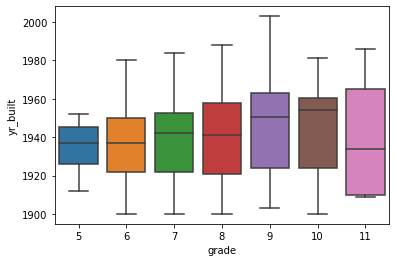

In [130]:
df_conts = df_1.loc[:,conts]

In [131]:
df_conts

,id,price,sqft_living,sqft_lot,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,2570,7242,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,696000.0,2300,3060,1510,1930,2002.0,98115,47.6827,-122.310,1590,3264
95,1483300570,905000.0,3300,10250,2390,1946,1991.0,98040,47.5873,-122.249,1950,6045
103,2450000295,1090000.0,2920,8113,2920,1950,2010.0,98004,47.5814,-122.196,2370,8113
125,4389200955,1450000.0,2750,17789,1980,1914,1992.0,98004,47.6141,-122.212,3060,11275
...,...,...,...,...,...,...,...,...,...,...,...,...
19577,421059018,257000.0,1397,18000,1397,1965,2014.0,98092,47.3388,-122.166,1950,31294
19602,6392000625,451000.0,900,6000,900,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,126039256,434900.0,1520,5040,1520,1977,2006.0,98177,47.7770,-122.362,1860,8710
20428,4305600360,500012.0,2400,9612,1230,1962,2009.0,98059,47.4799,-122.127,2430,5539


In [132]:
min_threshold, max_threshold = df_1.price.quantile([0.25, 0.75])
min_threshold, max_threshold

(410000.0, 850000.0)

In [133]:
df_2 = df_1[(df_1.price < max_threshold) & (df_1.price > min_threshold)]

In [134]:
df_2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
35,9547205180,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,3,8,1510,1930,2002.0,98115,47.6827,-122.310,1590,3264
209,6300000550,464000.0,6,3.00,2300,3404,2.0,0.0,0.0,3,7,1600,1920,1994.0,98133,47.7067,-122.343,1560,1312
379,7132300695,435000.0,3,1.50,1300,3348,1.5,0.0,0.0,3,7,1300,1904,2014.0,98144,47.5920,-122.307,1590,2577
435,2268400350,749000.0,4,2.50,1710,9627,1.0,0.0,0.0,3,9,1440,1976,2014.0,98006,47.5590,-122.164,2140,9131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497,6821101285,819000.0,3,1.75,1850,6000,1.5,0.0,0.0,3,8,1650,1913,1999.0,98199,47.6528,-122.401,1540,6000
19524,923000115,588000.0,3,1.75,2310,7620,2.0,0.0,0.0,3,8,2310,1942,1988.0,98177,47.7266,-122.363,2200,7672
19602,6392000625,451000.0,2,1.00,900,6000,1.0,0.0,0.0,3,7,900,1944,2004.0,98115,47.6855,-122.289,1460,4800
20041,126039256,434900.0,3,2.00,1520,5040,2.0,0.0,0.0,3,7,1520,1977,2006.0,98177,47.7770,-122.362,1860,8710


In [135]:
df_2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.034421,-0.039948,-0.134311,-0.129923,-0.198980,-0.112699,NaN,-0.003104,-0.058604,-0.200477,-0.170374,-0.199734,-0.040057,0.015549,-0.016377,-0.118875,-0.138436,-0.199249
price,-0.034421,1.000000,0.212505,0.282397,0.370777,0.014363,0.112944,NaN,0.292840,0.014404,0.455073,0.245742,0.078186,0.100445,0.022321,0.223038,-0.133455,0.355124,-0.043805
bedrooms,-0.039948,0.212505,1.000000,0.585033,0.570348,0.122622,0.169128,NaN,0.026436,-0.034211,0.207373,0.373969,0.120145,0.031055,-0.025928,-0.043665,0.079081,0.120831,0.061711
bathrooms,-0.134311,0.282397,0.585033,1.000000,0.627245,0.180097,0.305414,NaN,0.128301,-0.036885,0.367130,0.505275,0.222289,0.180312,-0.035180,-0.127417,0.069740,0.218076,0.119678
sqft_living,-0.129923,0.370777,0.570348,0.627245,1.000000,0.302632,0.271655,NaN,0.200873,0.007106,0.451749,0.769509,0.245953,0.027414,-0.027170,-0.120159,0.144117,0.414397,0.262837
sqft_lot,-0.198980,0.014363,0.122622,0.180097,0.302632,1.000000,-0.077731,NaN,-0.068817,0.068539,0.154167,0.389042,0.353069,-0.073262,-0.304211,-0.129964,0.547283,0.411454,0.787871
floors,-0.112699,0.112944,0.169128,0.305414,0.271655,-0.077731,1.000000,NaN,0.191815,0.041462,0.219663,0.496764,-0.086341,-0.135724,0.216235,0.068829,-0.118063,0.040442,-0.023238
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,-0.003104,0.292840,0.026436,0.128301,0.200873,-0.068817,0.191815,NaN,1.000000,0.112477,0.169303,0.126323,-0.080342,-0.130128,0.219476,-0.027999,-0.165517,0.236159,-0.010938
condition,-0.058604,0.014404,-0.034211,-0.036885,0.007106,0.068539,0.041462,NaN,0.112477,1.000000,-0.008826,0.087859,-0.008524,-0.310492,-0.089041,-0.134430,0.134526,0.006196,0.083378


<AxesSubplot:>

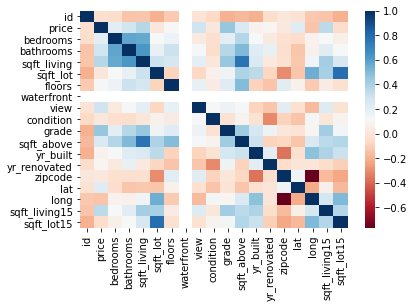

In [136]:
plt.figure
sns.heatmap(df_2.corr(), cmap = 'RdBu')

[Text(0, 0, '1900'),
 Text(1, 0, '1903'),
 Text(2, 0, '1904'),
 Text(3, 0, '1905'),
 Text(4, 0, '1907'),
 Text(5, 0, '1908'),
 Text(6, 0, '1909'),
 Text(7, 0, '1910'),
 Text(8, 0, '1911'),
 Text(9, 0, '1912'),
 Text(10, 0, '1913'),
 Text(11, 0, '1914'),
 Text(12, 0, '1915'),
 Text(13, 0, '1916'),
 Text(14, 0, '1917'),
 Text(15, 0, '1918'),
 Text(16, 0, '1919'),
 Text(17, 0, '1920'),
 Text(18, 0, '1921'),
 Text(19, 0, '1922'),
 Text(20, 0, '1923'),
 Text(21, 0, '1924'),
 Text(22, 0, '1925'),
 Text(23, 0, '1926'),
 Text(24, 0, '1927'),
 Text(25, 0, '1928'),
 Text(26, 0, '1929'),
 Text(27, 0, '1930'),
 Text(28, 0, '1931'),
 Text(29, 0, '1932'),
 Text(30, 0, '1934'),
 Text(31, 0, '1935'),
 Text(32, 0, '1936'),
 Text(33, 0, '1937'),
 Text(34, 0, '1938'),
 Text(35, 0, '1939'),
 Text(36, 0, '1940'),
 Text(37, 0, '1941'),
 Text(38, 0, '1942'),
 Text(39, 0, '1943'),
 Text(40, 0, '1944'),
 Text(41, 0, '1945'),
 Text(42, 0, '1946'),
 Text(43, 0, '1947'),
 Text(44, 0, '1948'),
 Text(45, 0, '1949')

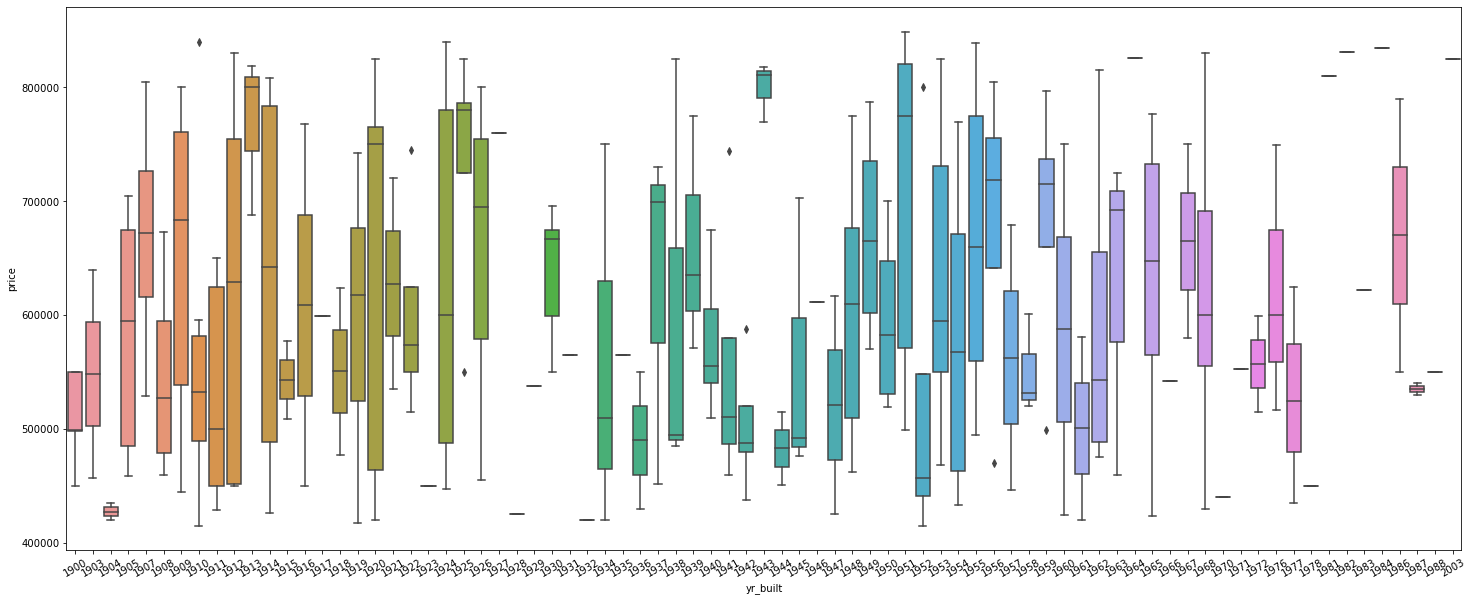

In [137]:

plt.figure(figsize=(25,10))
ax = sns.boxplot(x = 'yr_built', y = 'price', data = df_2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

<AxesSubplot:xlabel='grade', ylabel='yr_built'>

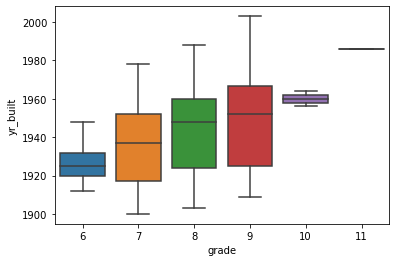

In [149]:
sns.boxplot(x = 'grade', y = 'yr_built', data = df_2)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

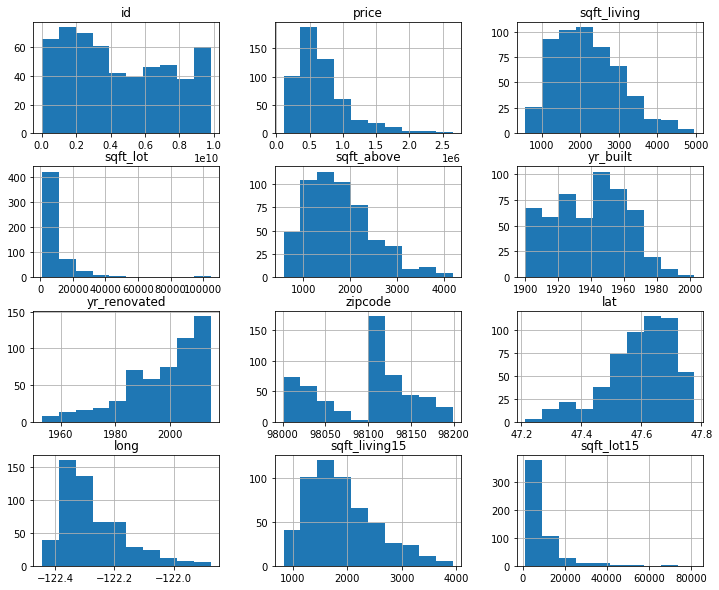

In [138]:
df_conts.hist(figsize = (12,10))

In [139]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [140]:
outcome = "price"

In [141]:
x_cols = df_2.dropna().drop(["price", "id", "sqft_above", "sqft_living15", "lat", "zipcode", "long", "sqft_lot", "yr_renovated"], axis = 1).columns

In [142]:
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'yr_built', 'sqft_lot15'],
      dtype='object')

In [143]:
predictors = '+'.join(x_cols)

In [144]:
predictors

'bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+sqft_lot15'

In [145]:
f = outcome + '~' + predictors

In [146]:
f

'price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+yr_built+sqft_lot15'

In [147]:
model = ols(formula = f, data= df_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     12.54
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           1.75e-16
Time:                        15:57:37   Log-Likelihood:                -3473.5
No. Observations:                 267   AIC:                             6967.
Df Residuals:                     257   BIC:                             7003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.432e+05   6.39e+05      0.537      0.592   -9.16e+05     1.6e+06
bedrooms     3556.1618   9534.257      0.373      0.709   -1.52e+04    2.23e+04
bathrooms    6017.0929   1.38e+04      0.438      0.662   -2.11e+04    3.31e+04
sqft_living    38.5075     15.141      2.543      0.012       8.691      68.324
floors      -2.148e+04   1.57e+04     -1.372      0.171   -5.23e+04    9341.079
waterfront   1.014e-09    1.9e-09      0.535      0.593   -2.72e-09    4.75e-09
view         2.964e+04   8261.774      3.588      0.000    1.34e+04    4.59e+04
condition    4080.9445   1.94e+04      0.211      0.833   -3.41e+04    4.23e+04
grade        6.132e+04   1.04e+04      5.898      0.000    4.08e+04    8.18e+04
yr_built     -142.9067    335.028     -0.427      0.670    -802.655     516.842
sqft_lot15     -1.7087      0.670     -2.552      0.011      -3.027      -0.390
==============================================================================
Omnibus:                        4.688   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.501
Skew:                           0.269   Prob(JB):                        0.105
Kurtosis:                       2.660   Cond. No.                     5.95e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:xlabel='long', ylabel='lat'>

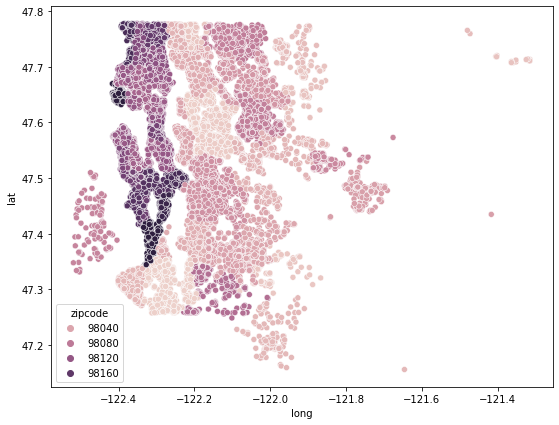

In [148]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='long', y='lat', hue= 'zipcode', data = df)